## Student Performance Indicatore

#### Life cycle of Machine Learning project

<li>Understanding the Problem Statement</li>
<li>Data Collection</li>
<li>Data checks to perform</li>
<li>Exploratory data analysis</li>
<li>Data preprocessing</li>
<li>Model Training</li>
<li>Choose best model</li>



### 1)Problem Statement
<li>This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.</li>

### 2) Data Collection
<li>Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977</li>
<li>The data consists of 8 column and 1000 rows.</li>

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import the CSV Data as Pandas DataFrame

In [8]:
df=pd.read_csv(r'C:\Users\SDS\Math-Score-prediction\notebook\data\students.csv')

### Show Top 5 Records

In [9]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [10]:
df.shape

(1000, 8)

### 2.2 Dataset information
<li>gender : sex of students -> (Male/female)</li>
<li>race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)</li>
<li>parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)</li>
<li>lunch : having lunch before test (standard or free/reduced)</li>
<li>test preparation course : complete or not complete before test</li>
<li>math score</li>
<li>reading score</li>
<li>writing score</li>

### 3. Data Checks to perform
<li>Check Missing values</li>
<li>Check Duplicates</li>
<li>Check data type</li>
<li>Check the number of unique values of each column</li>
<li>Check statistics of data set</li>
<li>Check various categories present in the different categorical column</li>

### 3.1 check missing value 

In [12]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insight:- There is no missing value

### 3.2 Check the duplicate value 

In [13]:
df.duplicated().sum()

0

### Insight :- There is no duplicated  value 

### 3.3 Cheking the data type 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 check the number of   unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
<li>From above description of numerical data, all means are very close to each other - between 66 and 68.05;</li>
<li>All standard deviations are also close - between 14.6 and 15.19;</li>
<li>While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17</li>

### 3.6 Check various categories present in the different categorical column

In [29]:

print("Categories in 'gender ' variable:-",end="")
print(df['gender'].unique())
print()
print("Categories in 'race_ethnicity' variable:-",end='')
print(df['race_ethnicity'].unique())
print()
print("Categories in  'parental_level_of_education'  vriable :-",end=" ")
print(df['parental_level_of_education'].unique())
print()
print("Categories in 'lunch' variable :- ",end='')
print(df['lunch'].unique())
print()
print("Categories in 'test_preparation_course' variable:-",end='')
print(df['test_preparation_course'].unique())

Categories in 'gender ' variable:-['female' 'male']

Categories in 'race_ethnicity' variable:-['group B' 'group C' 'group A' 'group D' 'group E']

Categories in  'parental_level_of_education'  vriable :- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable :- ['standard' 'free/reduced']

Categories in 'test_preparation_course' variable:-['none' 'completed']


## define the numerical columns and categorical columns in data set 

In [45]:
cat_feature=[cat for cat in df.select_dtypes(include=['object']).columns]
num_feature=[num for num in df.select_dtypes(exclude=['object']).columns]

print('we have {} numerical features:{}'.format(len(num_feature),num_feature))
print ('we have{}categorical features:{}'.format(len(cat_feature),cat_feature))

we have 3 numerical features:['math_score', 'reading_score', 'writing_score']
we have5categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns of"Total Score" and "Average Score"

In [48]:
df['Total_score']=df['math_score']+df["reading_score"]+df['writing_score']
df['Average_score']=df['Total_score']/3

In [51]:
df['Total_score'].max()
df['Average_score'].max()

100.0

In [62]:
math_full_score=df[df['math_score']==100]['Average_score'].count()
reading_full_score=df[df['reading_score']==100]['Average_score'].count()
writing_full_score=df[df['writing_score']==100]['Average_score'].count()

print(f"Number of students with full marks in math:{math_full_score}")
print(f"Number of students with full marks in reading:{reading_full_score}")
print(f"Number of students with full marks in writting:{writing_full_score}")

Number of students with full marks in math:7
Number of students with full marks in reading:17
Number of students with full marks in writting:14


In [75]:
math_less_than_20=df[df['math_score']<=20]['Average_score'].count()
read_less_than_20=df[df['reading_score']<=20]['Average_score'].count()
write_less_than_20=df[df['writing_score']<=20]['Average_score'].count()
print(f'Number of students with less than 20 marks in Math:{math_less_than_20}')
print(f'Number of students with less than 20 marks in read:{read_less_than_20}')
print(f'Number of students with less than 20 marks in writing:{write_less_than_20}')

Number of students with less than 20 marks in Math:4
Number of students with less than 20 marks in read:1
Number of students with less than 20 marks in writing:3


## Insight

<li>From above values we get students have wrost performance in Math section  </li>
<li> Best performance in Reading section </li>

# 4 Exploring Data (Visualization)
## 4.1 Visualize average score and total score distribution to make some conclusion
<li>Histogram </li>
<li>Kernel Distribution Function(Kde) </li>

### 4.1.1 histogram and kde

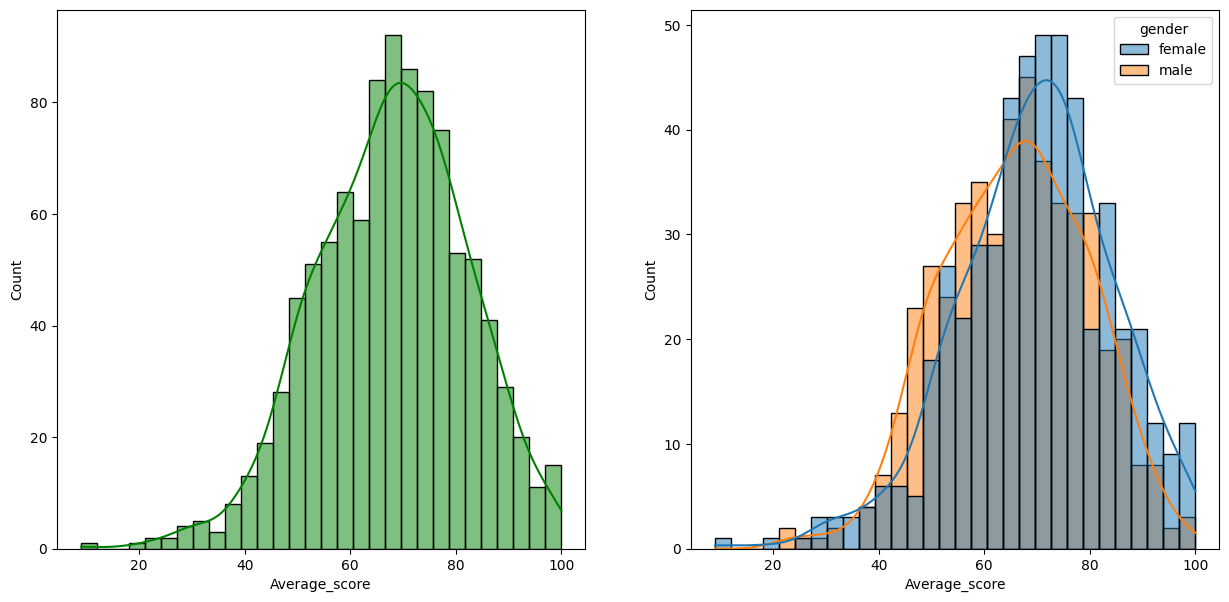

In [94]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='gender')
plt.show()

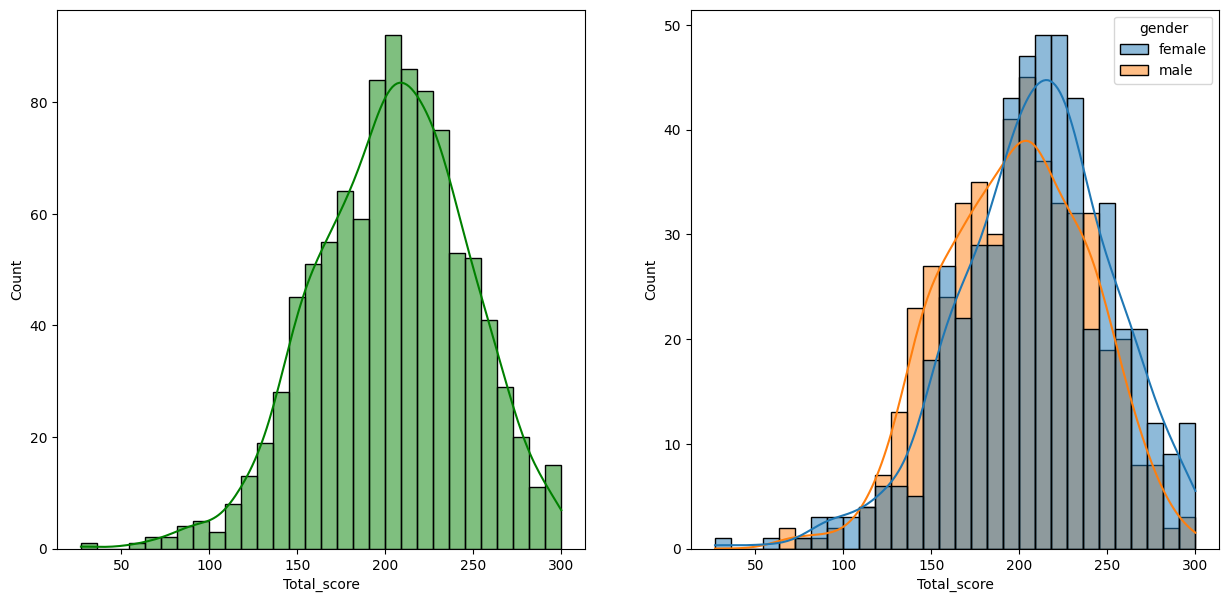

In [95]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,hue='gender')
plt.show()

## Insight
<li> Female students tends to perform well than male  students  </li>

C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2219397797.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2219397797.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2219397797.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='Average_score', ylabel='Count'>

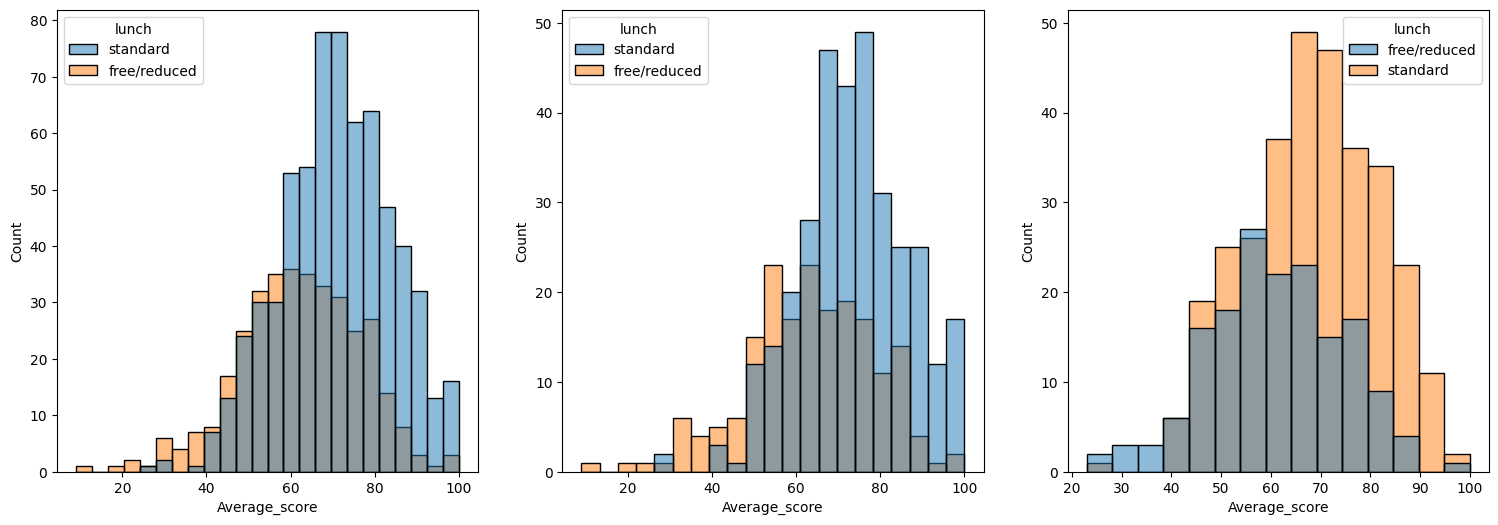

In [112]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average_score",hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="Average_score",hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x="Average_score",hue='lunch')

## Insight 
<li> Standard Lunch help to perform well</li>
<li> Male and female student who get Standard lunch perform well</li>

In [113]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2648179042.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2648179042.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\2648179042.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='Average_score', ylabel='Count'>

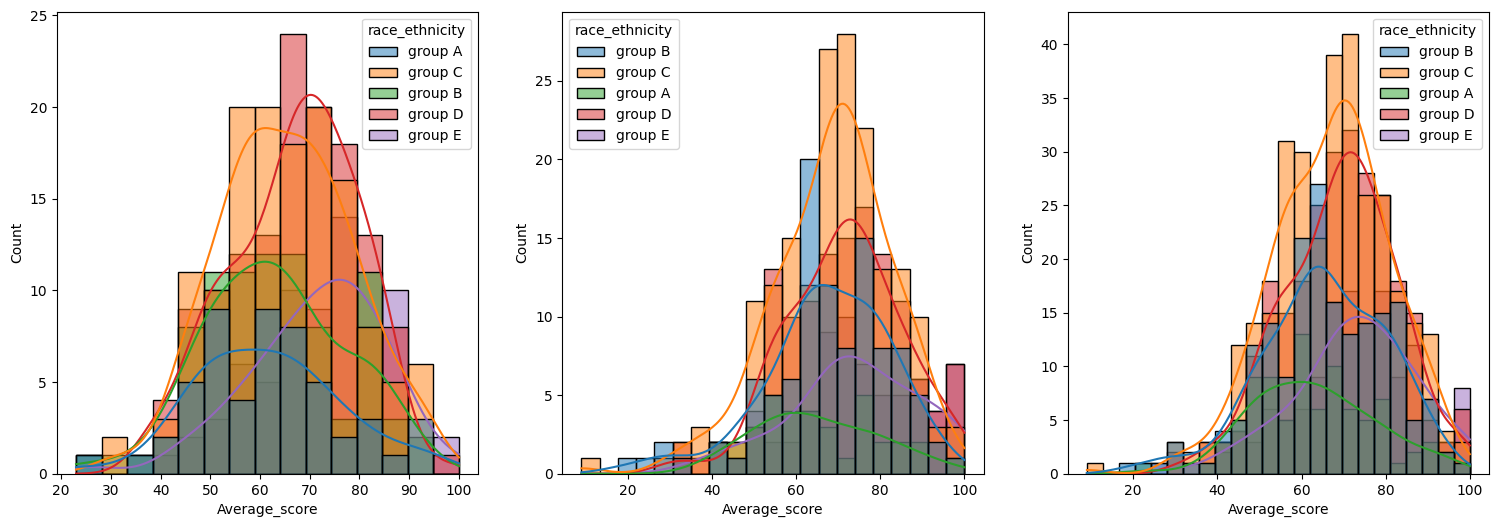

In [118]:
fig,axs=plt.subplots(ncols=3,nrows=1,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')

# Insight
<li> Students of group A and group B tends to perform poorly in exam.</li>
<li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female </li>
<li>male students of group D  are  getting best score </li>
<li>Female students of group C are getting best score  </li>

C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3043617000.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3043617000.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3043617000.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


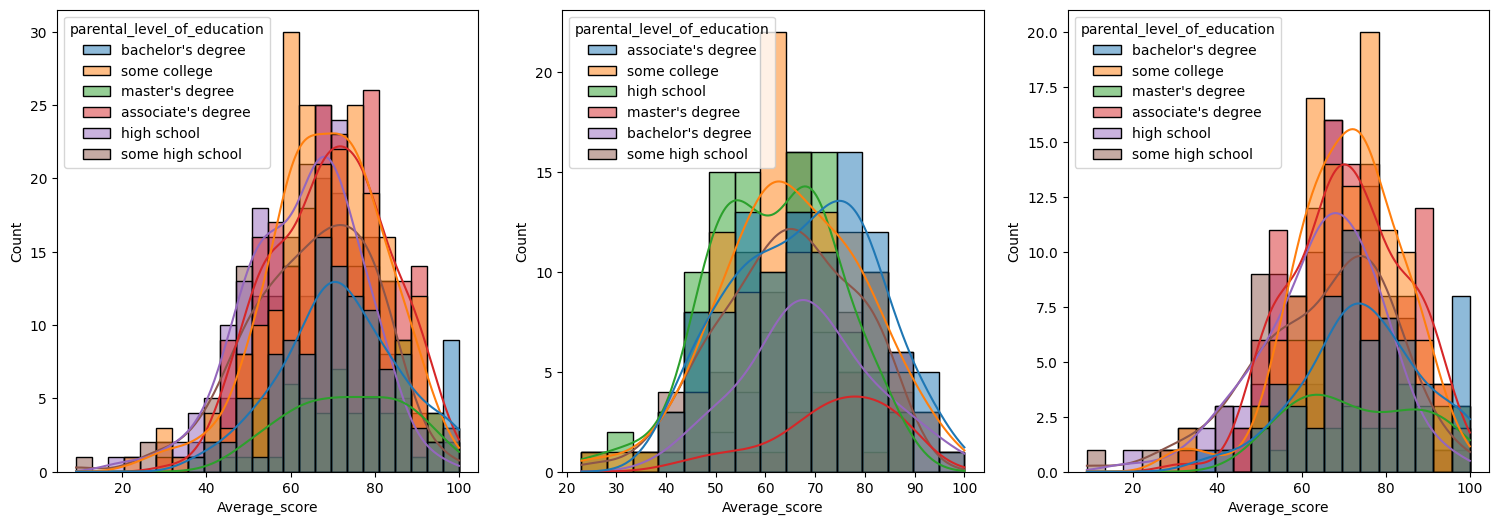

In [121]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.show()

# Insight
<li>  In generel parent education do not help student perform well in exam </li>
<li>For male students parents have some college degree,associates degree and high school degree those students perform well compaire to bachelore degree and master degree </li>
<li>Same for the Female students</li>

## 4.2 Maximumum score of students in all three subjects

C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3092211525.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3092211525.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\SDS\AppData\Local\Temp\ipykernel_3696\3092211525.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: title={'center': 'writing_score'}, ylabel='writing_score'>

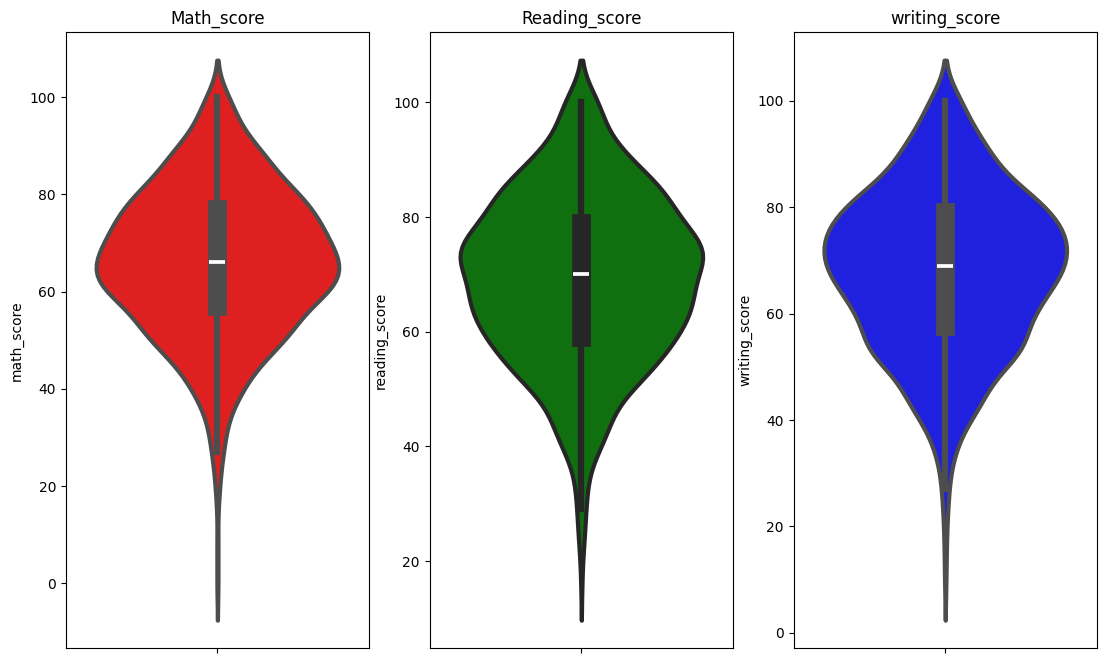

In [127]:
fig,axs=plt.subplots(ncols=3,nrows=1,figsize=(18,8))
plt.subplot(141)
plt.title('Math_score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title('Reading_score')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(143)
plt.title('writing_score')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)



# Insights
<li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas </li>
<li>in reading and writing most of them score from 50-80 </li>

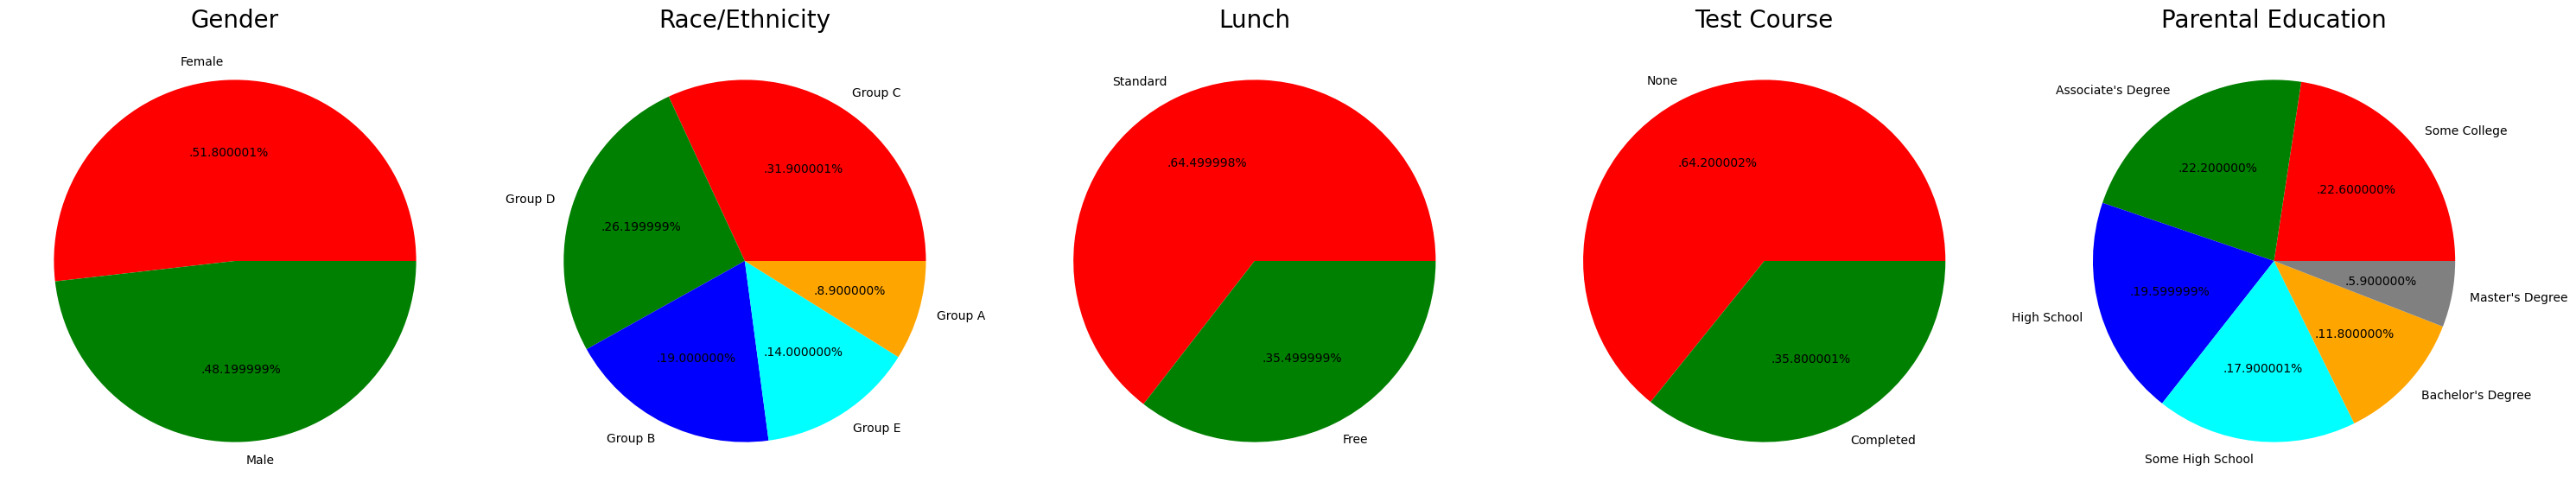

In [131]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()